In [1]:
%pylab inline
import pandas as pd
import fastparquet 
import os,sys

Populating the interactive namespace from numpy and matplotlib


/home/bo/miniconda2/envs/python27/lib/python2.7/site-packages/numba/errors.py:104: UserWarning: Insufficiently recent colorama version found. Numba requires colorama >= 0.3.9
  warnings.warn(msg)


In [2]:
import lightgbm as lgb

In [3]:
sys.path.insert(0,os.getcwd()+"/../../src/main")

In [5]:
import data
import config

In [6]:
reload (data)

<module 'data' from '/home/bo/mydev/lanlep2019/notebook/2/../../src/main/data.pyc'>

In [89]:
if 1:
    strategy = {'type':'byquake', "test_quakes":[[ 9,  4,  6] , [15,  1,  5], [10, 14,  3],  [7, 11,  2],  [8, 13, 12]]}
    types=['fwv','fwvext']
    #types=['fwvext']
    traintest = data.TrainTest('dense', coverages=None, types=types, transform=None, valid_strategy=strategy)

In [90]:
traintest.num_dataset()

5

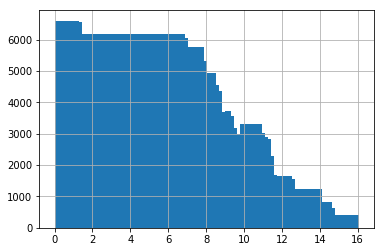

In [91]:
traintest.ydf.hist(bins=100);

In [92]:
np.abs(traintest.ydf-traintest.ydf.median()).mean()

3.02918898210172

In [93]:
testdf=traintest.get_test_data()
testdf.shape

(2624, 200)

In [94]:
datadf=traintest.traindf
datadf.head()

fwv_0     fwv_1     fwv_2     fwv_3     fwv_4  \
index                                                                    
quake_03_0200_105000  0.146316  0.267394  0.117802 -0.157496  0.061104   
quake_06_0120_099000  0.148596  0.267133  0.130696 -0.214939  0.099131   
quake_07_0296_013500  0.177460  0.230688  0.130831 -0.158412  0.087166   
quake_03_0090_034500  0.204399  0.217211  0.080866 -0.092751  0.087826   
quake_08_0137_055500  0.192906  0.242893  0.097641 -0.097974  0.083360   

                         fwv_5     fwv_6     fwv_7     fwv_8     fwv_9  \
index                                                                    
quake_03_0200_105000 -0.047981  0.023396  0.213477  0.177386 -0.101902   
quake_06_0120_099000 -0.010598  0.015269  0.249279  0.170874 -0.169247   
quake_07_0296_013500 -0.039375 -0.019466  0.233472  0.170282 -0.139383   
quake_03_0090_034500 -0.115556 -0.022419  0.137570  0.176601 -0.000350   
quake_08_0137_055500 -0.108193 -0.032382  0.158772  0.151101  0.020051   

                        ...       fwv_90    fwv_91    fwv_92    fwv_93  \
index                   ...                                              
quake_03_0200_105000    ...     0.136229 -0.111511 -0.011453 -0.204138   
quake_06_0120_099000    ...     0.146585 -0.126014 -0.036869 -0.229318   
quake_07_0296_013500    ...     0.167908 -0.052927 -0.002938 -0.140541   
quake_03_0090_034500    ...     0.139761 -0.079149  0.027307 -0.116974   
quake_08_0137_055500    ...     0.150628 -0.096553  0.009226 -0.143941   

                        fwv_94    fwv_95    fwv_96    fwv_97    fwv_98  \
index                                                                    
quake_03_0200_105000 -0.120658 -0.053782  0.120811 -0.013935 -0.193169   
quake_06_0120_099000 -0.075634 -0.043726  0.107364 -0.023247 -0.167797   
quake_07_0296_013500 -0.107919 -0.038414  0.130999 -0.030381 -0.207199   
quake_03_0090_034500 -0.158295 -0.068368  0.102986  0.005066 -0.182146   
quake_08_0137_055500 -0.141755 -0.067900  0.104496  0.029624 -0.167638   

                        fwv_99  
index                           
quake_03_0200_105000 -0.037983  
quake_06_0120_099000 -0.033895  
quake_07_0296_013500 -0.034261  
quake_03_0090_034500 -0.093264  
quake_08_0137_055500 -0.067433  

[5 rows x 200 columns]

In [95]:
ydf=traintest.ydf
ydf.head()

index
quake_03_0200_105000    0.998098
quake_06_0120_099000    2.318898
quake_07_0296_013500    4.532197
quake_03_0090_034500    5.302996
quake_08_0137_055500    2.514399
Name: y, dtype: float64

In [96]:
qdf=pd.DataFrame(datadf.index.map(lambda u: u.split("_")[1]).astype(np.int8),index=datadf.index)
qdf.head()

index
index                      
quake_03_0200_105000      3
quake_06_0120_099000      6
quake_07_0296_013500      7
quake_03_0090_034500      3
quake_08_0137_055500      8

In [97]:
qdf['index'].value_counts().to_frame().sort_index().T

0      1      2      3      4      5      6      7      8      9   \
index  3672  29520  36295  22631  32480  20574  18018  41240  20192  24635   

          10     11     12     13     14     15    16  
index  29228  28196  22560  21885  37761  24179  4674

In [98]:
qdf.shape,ydf.shape,datadf.shape

((417740, 1), (417740,), (417740, 200))

In [99]:
quakes=range(1,16)
quakes

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

In [100]:
idx=qdf['index'].isin(set(quakes)).values
ydf=ydf[idx]
qdf=qdf[idx]
datadf=datadf[idx]

In [101]:
qdf.shape,ydf.shape,datadf.shape

((409394, 1), (409394,), (409394, 200))

In [102]:
X=[]
for i in quakes:
    a=datadf[qdf['index']==i]
    a=a.mean().values
    X.append(a)
X=np.array(X).T    
X.shape

(200, 15)

In [103]:
Y=testdf.mean(0).values
Y.shape

(200,)

In [104]:
from sklearn.linear_model import LinearRegression, Ridge,Lasso

In [105]:
#reg=Lasso(fit_intercept=False,positive=True, alpha=0.00001).fit(X,Y)
reg=Ridge(fit_intercept=False).fit(X,Y)

In [106]:
reg.score(X,Y),reg.intercept_

(0.9562198531839337, 0.0)

In [107]:
b=(reg.coef_*train_len)
c1,c2=np.mean(b)*15,np.median(b)*15
(c1-4.5)/9,(c2-4.5)/9,np.mean(train_len)

NameError: name 'train_len' is not defined

In [108]:
reg.coef_

array([ 0.07111754, -0.05235855, -0.01879919,  0.01179538,  0.07502855,
        0.10126027,  0.15910016,  0.05995043,  0.04451987,  0.09811494,
        0.02264163, -0.01892304,  0.03043056,  0.15205087,  0.2183975 ],
      dtype=float32)

In [109]:
aa={1: 7.903253460902388,
 2: 4.1204295533508954,
 3: 7.212928061608938,
 4: 7.176061206274759,
 5: 3.1690071931048647,
 6: 9.83903397840828,
 7: 5.527431626478293,
 8: 3.3810464957744943,
 9: 9.523910652643734,
 10: 6.606302326425366,
 11: 4.4334154594192885,
 12: 9.71276096648772,
 13: 5.709551678391608,
 14: 6.553191829827333,
 15: 9.131675510902053}.values()
aa=np.array(aa)/np.sum(aa)
aa

array([0.07903253, 0.0412043 , 0.07212928, 0.07176061, 0.03169007,
       0.09839034, 0.05527432, 0.03381046, 0.09523911, 0.06606302,
       0.04433415, 0.09712761, 0.05709552, 0.06553192, 0.09131676])